In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

from matplotlib import style
style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [109]:


# Load the dataset into a Pandas DataFrame with specified encoding
df = pd.read_csv('data_rdd.csv', encoding='ISO-8859-1')



In [110]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [111]:

# df.describe()
df

,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,3,...,0,0,0,0,0,0,0,1,1,0
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,4,...,1,1,0,0,0,0,0,1,0,0
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,4,...,0,0,0,0,0,0,0,1,0,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,4,...,1,1,0,0,0,0,0,1,1,0
4,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,0,1.733333,1.5,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,0,1.888889,2.0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,0,2.090909,2.0,0,0,1,no stars,...,0,0,0,0,0,0,0,0,0,0
4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,0,2.000000,2.0,1,0,0,no stars,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# Now we clean the data by removing missing values

data = df[df['views']!=0] 


# Here, we have the same dataset as before
# except for any entries whose views had a value of zero views entered. As for these entries no analysis can be done, 
#so they have gotten reomoved.

data

,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,4,...,1,1,0,0,0,0,0,1,0,0
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,4,...,0,0,0,0,0,0,0,1,0,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,4,...,1,1,0,0,0,0,0,1,1,0
5,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Santa Maria,25,1,4.773569,5.0,1,0,0,3,...,0,0,0,0,0,0,0,1,0,0
7,https://www.tripadvisor.com/Hotel_Review-g1877...,Boutique Hotel Campo de Fiori,41,1,4.712942,4.5,1,0,0,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,https://www.tripadvisor.com/Hotel_Review-g1877...,Wyndham Rome Midas,3,1,3.270777,3.5,1,0,0,4,...,0,0,0,0,0,0,0,1,1,0
2631,https://www.tripadvisor.com/Hotel_Review-g1877...,SHG Hotel Porta Maggiore,6,1,3.143337,3.0,1,0,0,3,...,0,0,0,0,0,0,0,1,0,0
2661,https://www.tripadvisor.com/Hotel_Review-g1877...,Leonardo Boutique Hotel Rome Termini,7,1,4.400000,4.5,1,0,0,4,...,0,0,0,0,0,0,0,1,0,0
3513,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Nizza,2,1,3.044728,3.0,1,0,0,3,...,0,0,0,0,0,0,0,1,0,0


In [113]:
# Remove columns we will not be needing for our analysis
data = data.drop(columns=[ 'views_binary', 'hotel_url'])
    


In [114]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Handle infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (if any)
data = data.dropna()




In [116]:
data_final=data
data_final

,name,views,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class,class_4_5,class_3_4_5,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
1,Hotel Artemide,88,4.798118,5.0,1,0,0,4,1,1,...,1,1,0,0,0,0,0,1,0,0
2,A.Roma Lifestyle Hotel,32,4.634085,4.5,1,0,0,4,1,1,...,0,0,0,0,0,0,0,1,0,0
3,iQ Hotel Roma,17,4.699138,4.5,1,0,0,4,1,1,...,1,1,0,0,0,0,0,1,1,0
5,Hotel Santa Maria,25,4.773569,5.0,1,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Boutique Hotel Campo de Fiori,41,4.712942,4.5,1,0,0,4,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,B&B Hotel Roma San Lorenzo Termini,2,4.857143,5.0,1,0,0,no stars,0,0,...,0,0,0,0,0,0,0,1,0,0
2631,SHG Hotel Porta Maggiore,6,3.143337,3.0,1,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2661,Leonardo Boutique Hotel Rome Termini,7,4.400000,4.5,1,0,0,4,1,1,...,0,0,0,0,0,0,0,1,0,0
3513,Hotel Nizza,2,3.044728,3.0,1,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0


In [120]:
# Define predictor variables (features) and target variable
X = data_final[['views', 'location_grade',  'discount_perc', 'price_min']]
y = data_final['score_adjusted']


# split data into train and test sets
seed = 42
val_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [121]:
# First we fine tune our random forest parameters using grid search method

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the base model
rf_base = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Negative Mean Squared Error:  -0.16302071213880007


In [122]:
# Now we go ahead and train our random forest model using the best parameter foudn by grid search

rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [123]:
# Now we make predictions on our testing dataset
y_pred = rf_model.predict(X_test)

In [124]:
# Evaluating our model by findin gthe mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08292815462333239


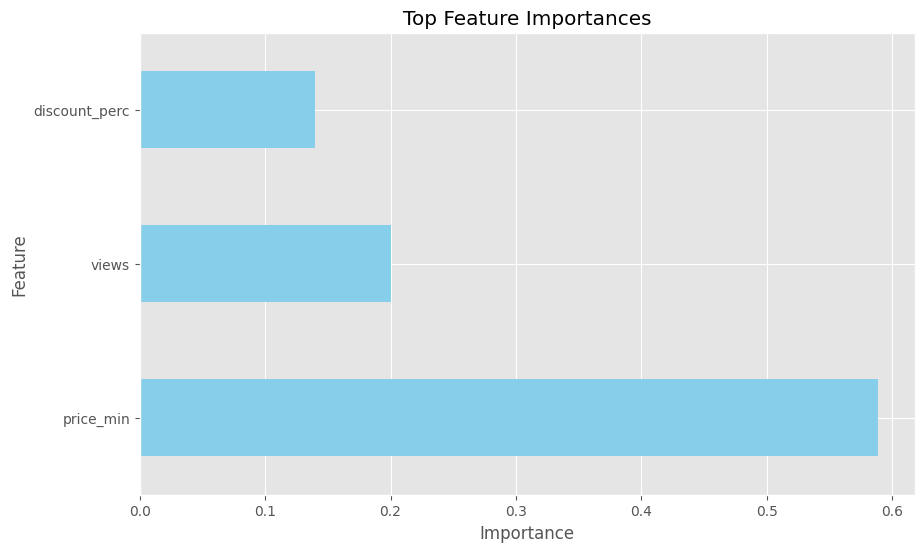

In [125]:
#Feature importance

import matplotlib.pyplot as plt


# Assuming 'X' contains your features and 'y' is the target variable (hotel ratings)
# Split your data into training and testing sets if you haven't already

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and plot the top N features
top_n = 3  # Change this value based on the number of features you want to display
top_features = feature_importance.nlargest(top_n)

# Plotting
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()